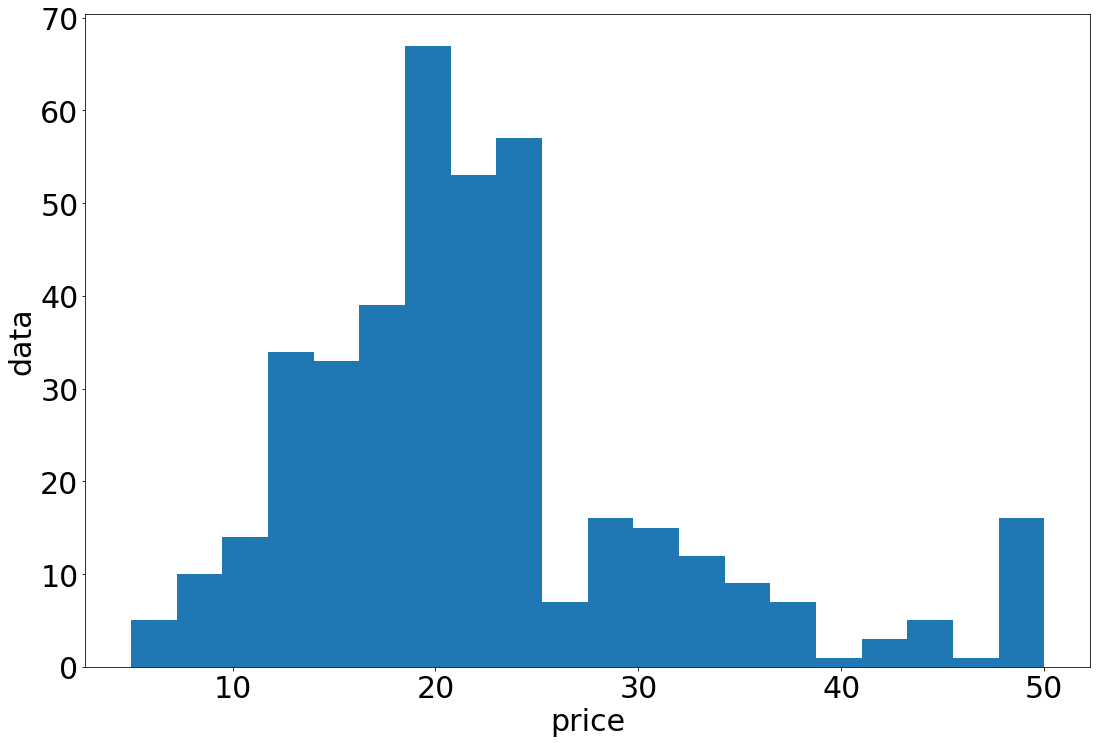

Text(0, 0.5, 'price')

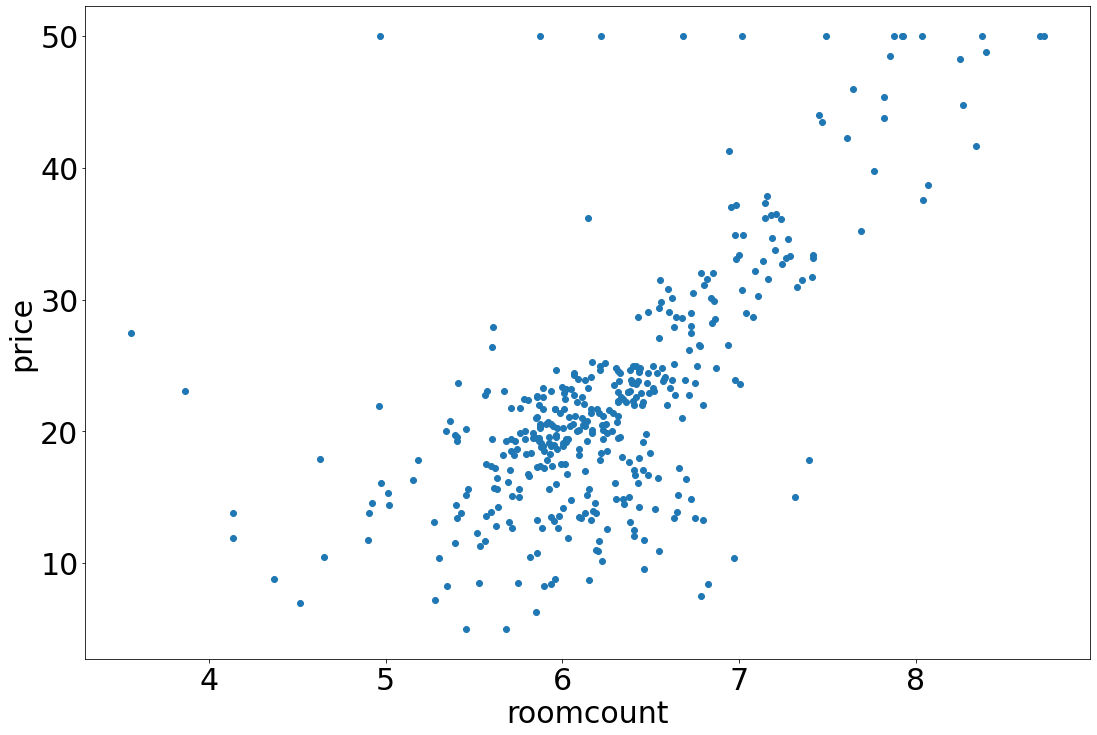

In [26]:
import tensorflow as tf 
import matplotlib.pyplot as plt


(x_train,y_train),(x_test,y_test) = tf.keras.datasets.boston_housing.load_data()

plt.rcParams['font.size'] = 10*3 
plt.rcParams['figure.figsize'] = [18,12]
plt.rcParams['font.family'] = ['IPAexGothic']
plt.hist(y_train,bins=20)
plt.xlabel('price')
plt.ylabel('data')


plt.show()


plt.plot(x_train[:,5],y_train,'o')
plt.xlabel('roomcount')
plt.ylabel('price')




step:0,train_loss:22.532197952270508
step:1,train_loss:5.363197326660156
step:2,train_loss:3.3018991947174072
step:3,train_loss:2.4357738494873047
step:4,train_loss:1.8736717700958252
step:5,train_loss:1.4852508306503296
step:6,train_loss:1.2110788822174072
step:7,train_loss:1.0139186382293701
step:8,train_loss:0.8693897724151611
step:9,train_loss:0.7613123059272766
step:10,train_loss:0.6788366436958313
step:11,train_loss:0.614616334438324
step:12,train_loss:0.5636268854141235
step:13,train_loss:0.5223963260650635
step:14,train_loss:0.4884975850582123
step:15,train_loss:0.46021345257759094
step:16,train_loss:0.4363115131855011
step:17,train_loss:0.41589367389678955
step:18,train_loss:0.39829468727111816
step:19,train_loss:0.3830130994319916
step:20,train_loss:0.36966362595558167
step:21,train_loss:0.3579450249671936
step:22,train_loss:0.34761738777160645
step:23,train_loss:0.33848658204078674
step:24,train_loss:0.3303928077220917
step:25,train_loss:0.3232031464576721
step:26,train_loss

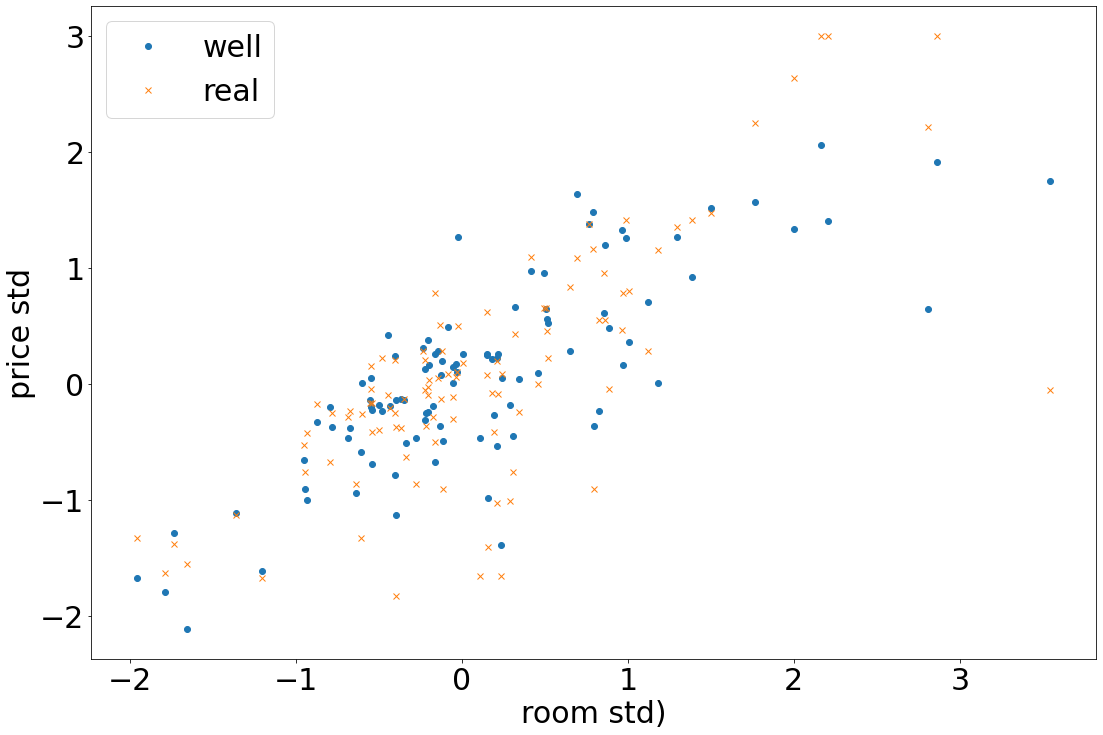

In [53]:
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)
y_train_mean = y_train.mean(axis=0)
y_train_std = y_train.std(axis=0)


x_train = (x_train - x_train_mean)/x_train_std
y_train = (y_train - y_train_mean)/y_train_std

x_test = (x_test - x_train_mean)/x_train_std
y_test = (y_test - y_train_mean)/y_train_std



x = tf.placeholder(tf.float32,(None,13),name='x')
y = tf.placeholder(tf.float32,(None,1),name='y')

w = tf.Variable(tf.random_normal((13,1)))

pred  = tf.matmul(x,w)

loss = tf.reduce_mean((y -pred)**2)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_step = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(100):
        train_loss,_ = sess.run(
            [loss,train_step],
            feed_dict={
                x: x_train,
                y: y_train.reshape((-1,1))
            }
        )
        print('step:{},train_loss:{}'.format(step,train_loss))
        
        pred_=sess.run(
            pred,
            feed_dict={
                x: x_test
            }
        )
        
        
        
    plt.plot(x_test[:, 5], pred_, 'o', label='well')
    plt.plot(x_test[:, 5], y_test, 'x', label='real')
    plt.legend(loc='upper left')
    plt.xlabel('room std)')
    plt.ylabel('price std')
